![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

### Load the CSV files into yearly and monthly data frames and check the data.

In [7]:
# Imported libraries
library(tidyverse)
library(ggplot2)

# Load datas
yearly <- read_csv('data/yearly_deaths_by_clinic.csv')
yearly

monthly <- read_csv('data/monthly_deaths.csv')
monthly

Rows: 12 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): clinic
dbl (3): year, births, deaths

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,births,deaths,clinic
<dbl>,<dbl>,<dbl>,<chr>
1841,3036,237,clinic 1
1842,3287,518,clinic 1
1843,3060,274,clinic 1
1844,3157,260,clinic 1
1845,3492,241,clinic 1
1846,4010,459,clinic 1
1841,2442,86,clinic 2
1842,2659,202,clinic 2
1843,2739,164,clinic 2


Rows: 98 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): births, deaths
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,births,deaths
<date>,<dbl>,<dbl>
1841-01-01,254,37
1841-02-01,239,18
1841-03-01,277,12
1841-04-01,255,4
1841-05-01,255,2
1841-06-01,200,10
1841-07-01,190,16
1841-08-01,222,3
1841-09-01,213,4


### Add a proportion_deaths column to each df, calculating the proportion of deaths per number of births for each year in yearly and month in monthly

In [8]:
# Manipulate data

# Add proportion_death to each data
yearly <- yearly %>% mutate(proportion_deaths=deaths/births)

monthly <- monthly %>% mutate(proportion_deaths=deaths/births)

### Create two ggplot line plots: one for the yearly proportion of deaths and another for the monthly proportion of deaths. For the yearly plot, create a different colored line for each clinic.

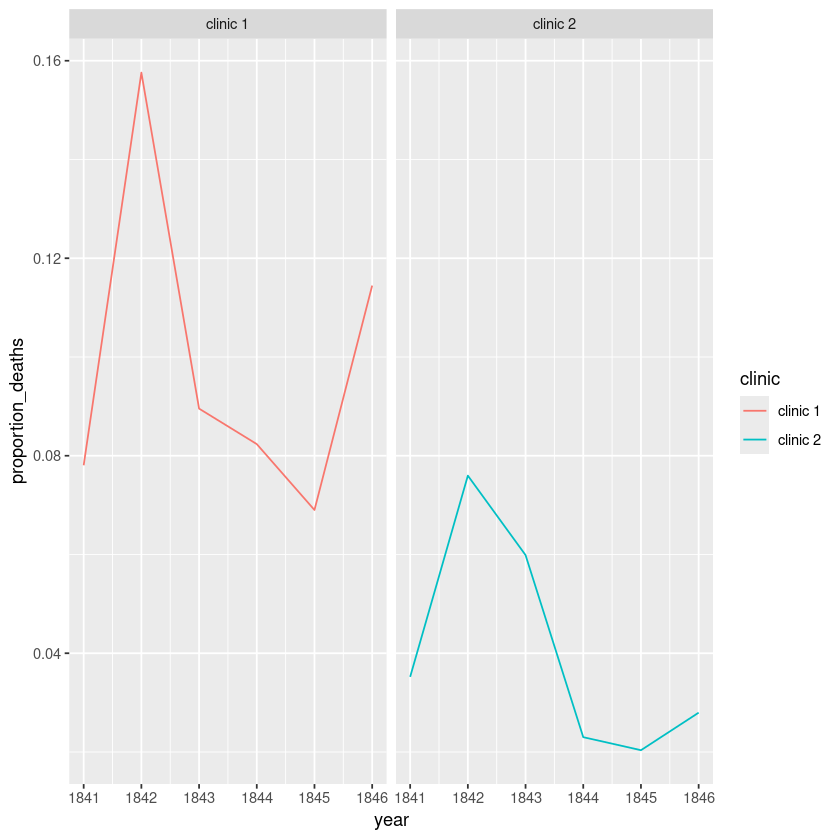

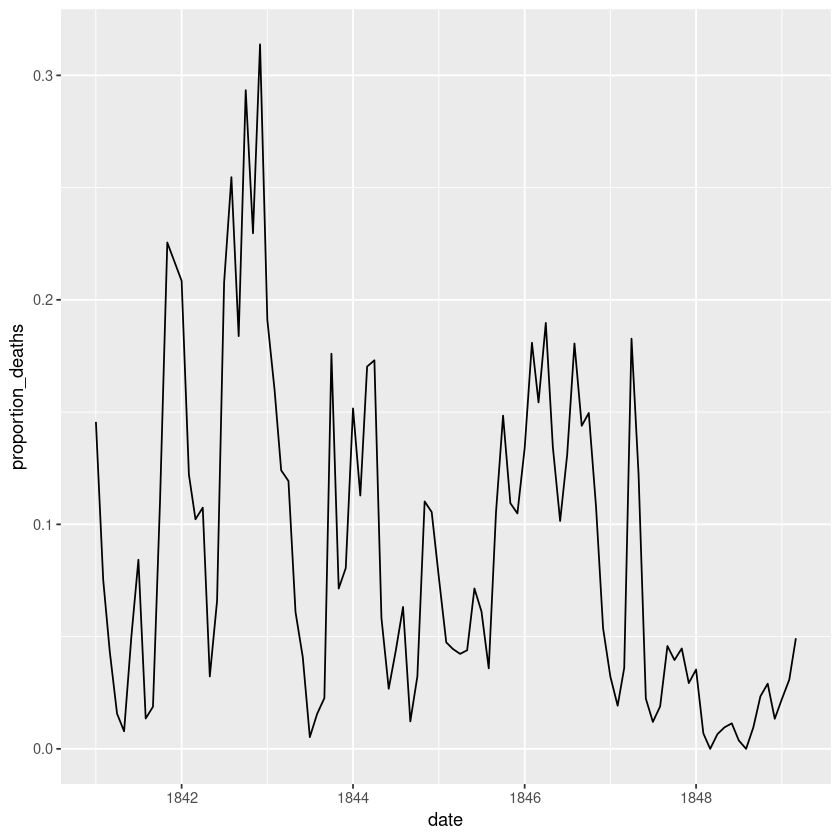

In [9]:
ggplot(yearly, aes(x=year, y=proportion_deaths, color=clinic)) + 
	geom_line() +
	facet_wrap(~clinic)

ggplot(monthly, aes(x=date, y=proportion_deaths)) + 
	geom_line()

### Add a handwashing_started boolean column to monthly using June 1st, 1847 as the threshold; TRUE should mean that handwashing has started at the clinic.

In [10]:
library(dplyr)
library(lubridate)

glimpse(monthly)
# Add handwashing_started boolean column
monthly <- monthly %>%
  mutate(handwashing_started = date >= ymd("1847-06-01"))

Rows: 98
Columns: 4
$ date              <date> 1841-01-01, 1841-02-01, 1841-03-01, 1841-04-01, 184…
$ births            <dbl> 254, 239, 277, 255, 255, 200, 190, 222, 213, 236, 23…
$ deaths            <dbl> 37, 18, 12, 4, 2, 10, 16, 3, 4, 26, 53, 64, 38, 27, …
$ proportion_deaths <dbl> 0.145669291, 0.075313808, 0.043321300, 0.015686275, …


### Plot the new df with different colored lines depending on handwashing_started

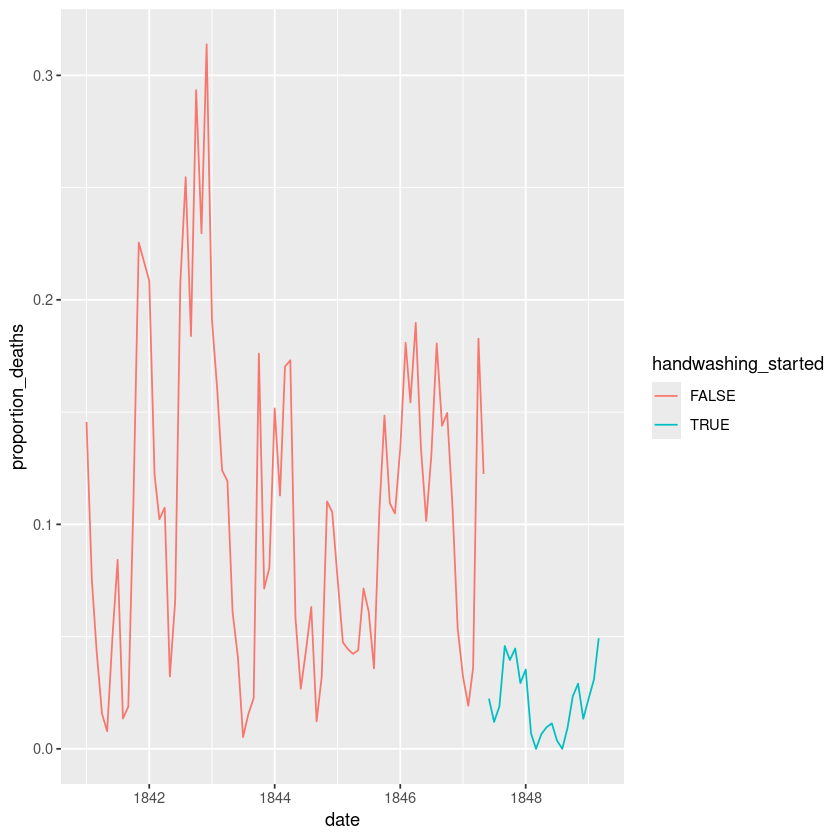

In [11]:
monthly %>% ggplot(aes(x=date, y=proportion_deaths, color=handwashing_started)) + 
	geom_line()

### Calculate the mean proportion of deaths before and after handwashing from the monthly data, and store the result as a 2x2 df named monthly_summary with the first column containing the handwashing_started groups and the second column having the mean proportion of deaths.

In [12]:
monthly_summary <- monthly %>% group_by(handwashing_started) %>% summarize(
	mean_dealthprop = mean(proportion_deaths)
)

monthly_summary

handwashing_started,mean_dealthprop
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338
